In [70]:
import pandas as pd

air_quality_df = pd.read_csv('data/datathon24_parte1/air_quality_gijon.csv')
meteo_df = pd.read_csv('data/datathon24_parte1/meteo_gijon.csv')
mobility_df = pd.read_csv('data/datathon24_parte1/movility_gijon.csv')


merged_df = air_quality_df.merge(meteo_df, on='date', how='outer').merge(mobility_df, on='date', how='outer')

In [71]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 1826 non-null   object 
 1   SO2_OesteAvdaArgentina               1826 non-null   float64
 2   SO2_EsteAvdaCastilla                 1826 non-null   float64
 3   NO2_OesteAvdaArgentina               1826 non-null   float64
 4   NO_EsteAvdaCastilla                  1826 non-null   float64
 5   NO2_OesteAvdaArgentina.1             1826 non-null   float64
 6   NO2_EsteAvdaCastilla                 1826 non-null   float64
 7   CO_OesteAvdaArgentina                1826 non-null   float64
 8   CO_EsteAvdaCastilla                  1826 non-null   float64
 9   PM10_OesteAvdaArgentina              1826 non-null   float64
 10  PM10_EsteAvdaCastilla                1826 non-null   float64
 11  O3_OesteAvdaArgentina         

In [72]:
merged_df.to_csv('data/datathon24_parte1/merged_gijon.csv', index=False)

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Aggregate all mobility (traffic) columns into a single variable
merged_df["total_traffic"] = merged_df.filter(like="trafico").sum(axis=1)

# Step 2: Select the specified air quality, meteorological, and the aggregated mobility variable for correlation analysis
variables_of_interest = [
    "SO2_GijonGlobal",
    "NO_GijonGlobal",
    "NO2_GijonGlobal",
    "CO_GijonGlobal",
    "PM10_GijonGlobal",
    "O3_GijonGlobal",
    
    "tmed_Gijon",
    "prec_Gijon",
    "sol_Gijon",
    "presMin_Gijon",
    "presMax_Gijon",
    "velmedia_Gijon",
    "racha_Gijon",
    
    "total_traffic",
]

# Creating a subset for the correlation analysis
subset_df = merged_df[variables_of_interest]

# Step 3: Calculate the Pearson correlation coefficient
correlation_matrix = subset_df.corr()

# Display the correlation matrix focusing on the air quality variables
correlation_matrix.loc[
    [
        "SO2_GijonGlobal",
        "NO_GijonGlobal",
        "NO2_GijonGlobal",
        "CO_GijonGlobal",
        "PM10_GijonGlobal",
        "O3_GijonGlobal",
    ]
]

,SO2_GijonGlobal,NO_GijonGlobal,NO2_GijonGlobal,CO_GijonGlobal,PM10_GijonGlobal,O3_GijonGlobal,tmed_Gijon,prec_Gijon,sol_Gijon,presMin_Gijon,presMax_Gijon,velmedia_Gijon,racha_Gijon,total_traffic
SO2_GijonGlobal,1.000000,0.211349,0.292682,0.314860,0.235856,-0.086423,-0.157384,0.002325,0.004044,-0.055130,0.004144,0.154683,0.176065,0.078419
NO_GijonGlobal,0.211349,1.000000,0.706639,0.348052,0.444507,-0.353945,-0.275549,-0.106956,0.076020,0.070093,0.100735,-0.216986,-0.134608,0.301941
NO2_GijonGlobal,0.292682,0.706639,1.000000,0.368917,0.428865,-0.149500,-0.423025,0.010872,-0.026180,-0.012015,0.056292,-0.167971,-0.043141,0.354328
CO_GijonGlobal,0.314860,0.348052,0.368917,1.000000,0.228294,-0.180355,-0.172095,0.007511,0.025357,-0.014891,0.027546,-0.035144,0.004217,0.123233
PM10_GijonGlobal,0.235856,0.444507,0.428865,0.228294,1.000000,-0.145843,-0.063750,-0.050342,0.023138,-0.006829,0.020839,-0.088846,-0.017171,0.058025
O3_GijonGlobal,-0.086423,-0.353945,-0.149500,-0.180355,-0.145843,1.000000,0.066526,-0.042327,0.270791,-0.074617,-0.090605,0.195666,0.171060,-0.122897


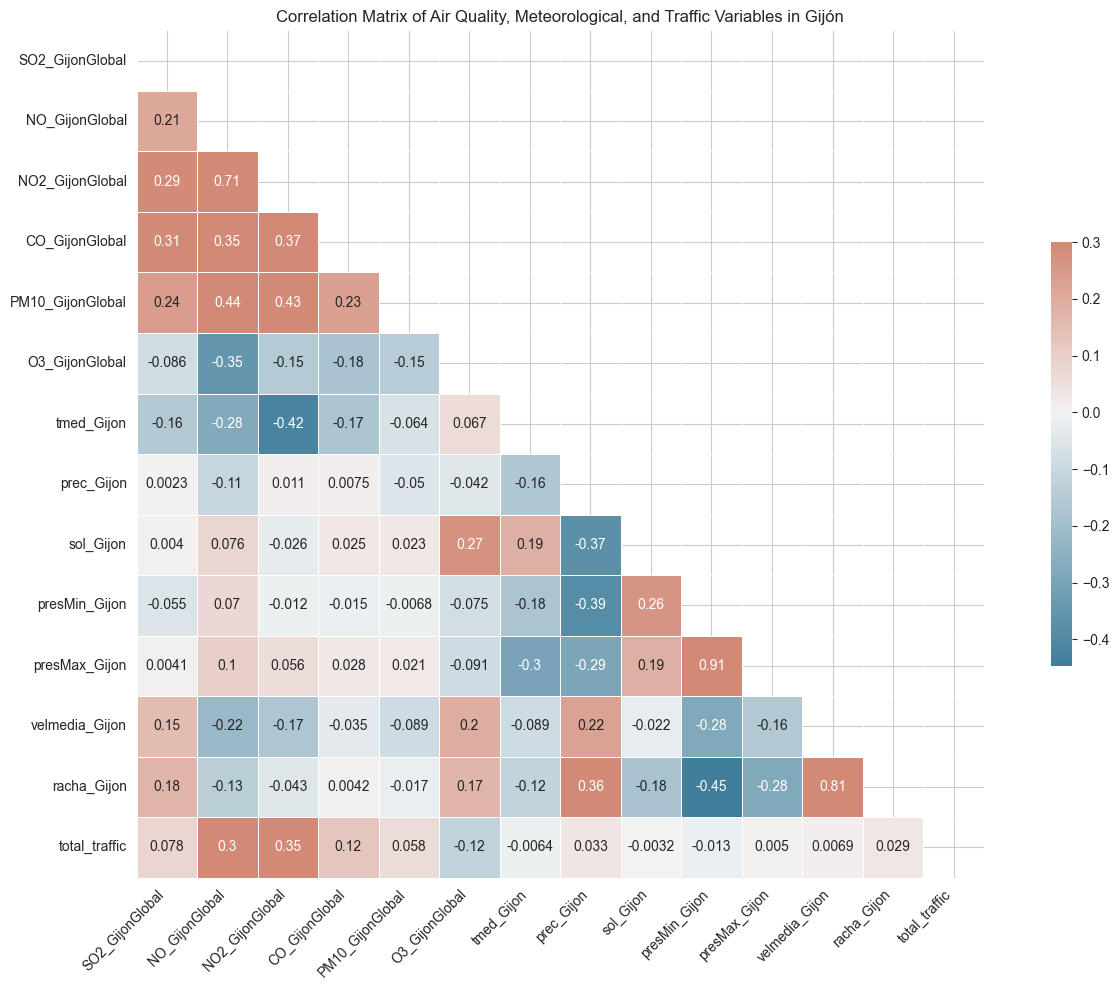

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute the correlation matrix for the selected variables
correlation_matrix = subset_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Matrix of Air Quality, Meteorological, and Traffic Variables in Gijón')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Nota: No utilizar monoxido de carbono

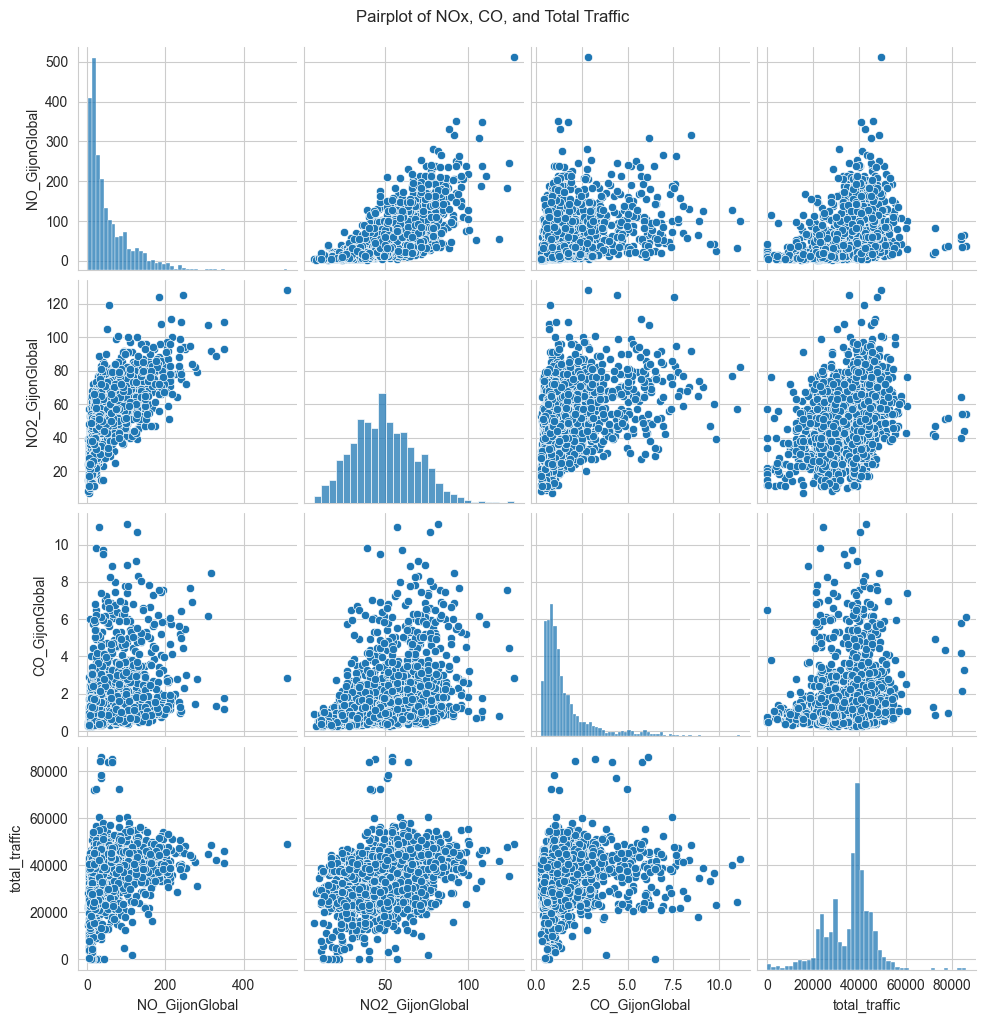

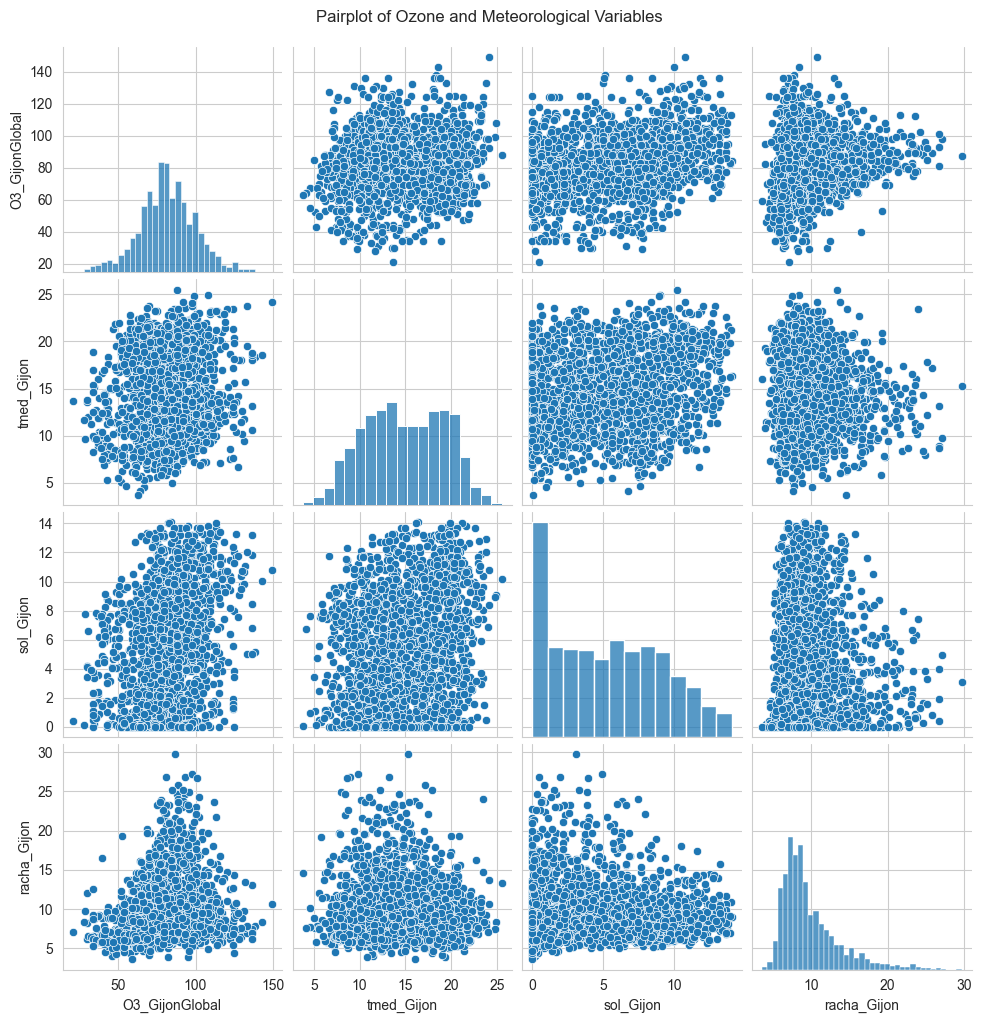

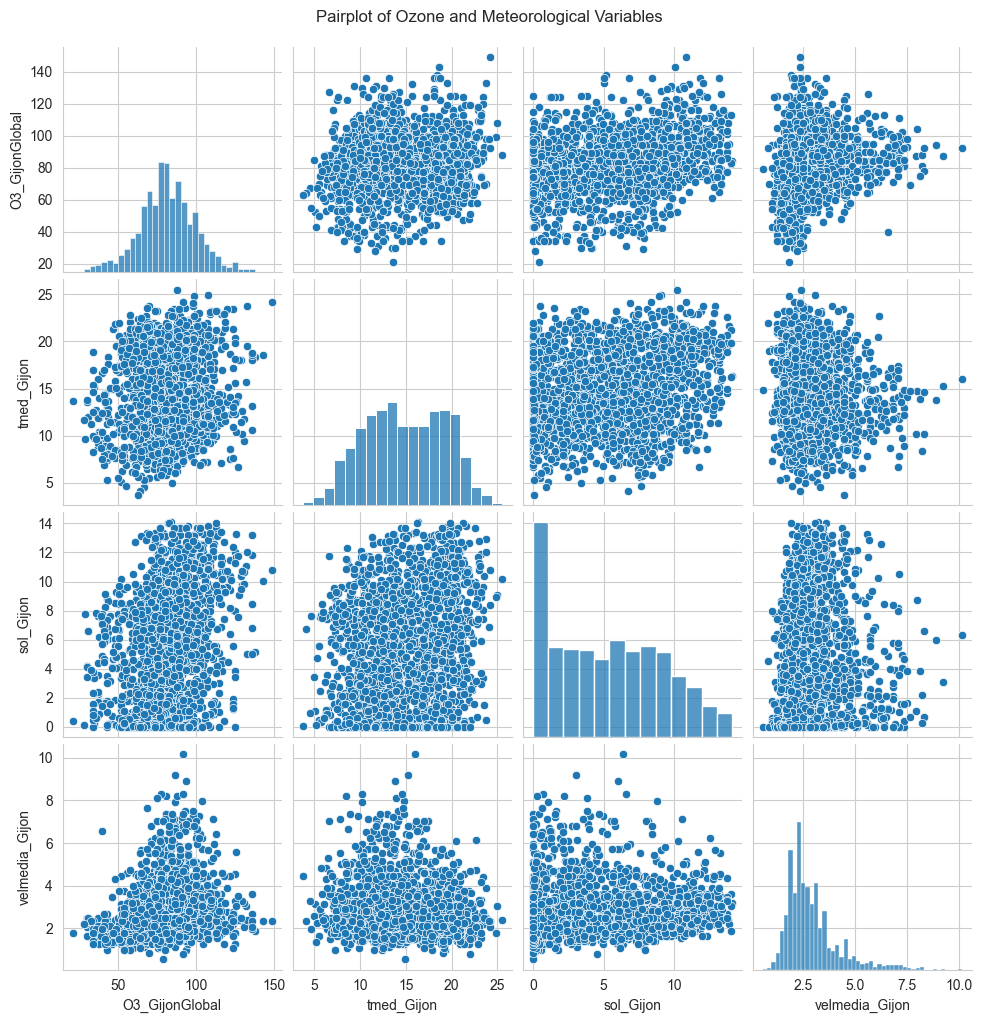

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Prepare the data for plotting
plot_data = merged_df[[
    'NO_GijonGlobal', 'NO2_GijonGlobal', 'CO_GijonGlobal', 
    'O3_GijonGlobal', 'tmed_Gijon', 'sol_Gijon', 'racha_Gijon', 
    'total_traffic', 'velmedia_Gijon'
]]

# Pairplot for NOx, CO, and traffic
sns.pairplot(plot_data, vars=['NO_GijonGlobal', 'NO2_GijonGlobal', 'CO_GijonGlobal', 'total_traffic'])
plt.suptitle('Pairplot of NOx, CO, and Total Traffic', y=1.02)

# Pairplot for O3 and meteorological variables
sns.pairplot(plot_data, vars=['O3_GijonGlobal', 'tmed_Gijon', 'sol_Gijon', 'racha_Gijon'])
plt.suptitle('Pairplot of Ozone and Meteorological Variables', y=1.02)

# Pairplot for O3 and meteorological variables
sns.pairplot(plot_data, vars=['O3_GijonGlobal', 'tmed_Gijon', 'sol_Gijon', 'velmedia_Gijon'])
plt.suptitle('Pairplot of Ozone and Meteorological Variables', y=1.02)

plt.show()


# Pregunta 3. ¿Se advierten diferencias en el tráfico y la contaminación entre el periodo Covid y los mismos periodos en años anteriores y posteriores?

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'merged_df' is your DataFrame name
merged_df['date'] = pd.to_datetime(merged_df['date'])
merged_df.set_index('date', inplace=True)

In [84]:

# COVID-19 periods in 2020
covid_periods = [("2020-03-01", "2020-06-21"), ("2020-10-25", "2021-05-09")]

# Equivalent periods for 2019 and 2021 (adjust if necessary)
equivalent_periods = [("2019-03-01", "2019-06-21"), ("2019-10-25", "2020-05-09"),
                      ("2021-03-01", "2021-06-21"), ("2021-10-25", "2022-05-09")]

# Function to calculate average pollution and traffic
def calculate_averages(df, periods):
    averages = []
    for start, end in periods:
        period_df = df[start:end]
        avg_pollution_no2 = period_df[['NO2_GijonGlobal']].mean().values[0]
        avg_pollution_pm10 = period_df[['PM10_GijonGlobal']].mean().values[0]
        traffic_columns = [col for col in df.columns if 'trafico' in col]
        avg_traffic = period_df[traffic_columns].mean(axis=1).mean()
        averages.append((start, end, avg_pollution_no2, avg_pollution_pm10, avg_traffic))
    return averages

# Calculate averages for COVID and equivalent periods
covid_averages = calculate_averages(merged_df, covid_periods)
equivalent_averages = calculate_averages(merged_df, equivalent_periods)

# Calculate daily average traffic across all sectors
daily_avg_traffic = merged_df[[col for col in merged_df.columns if 'trafico' in col]].mean(axis=1)

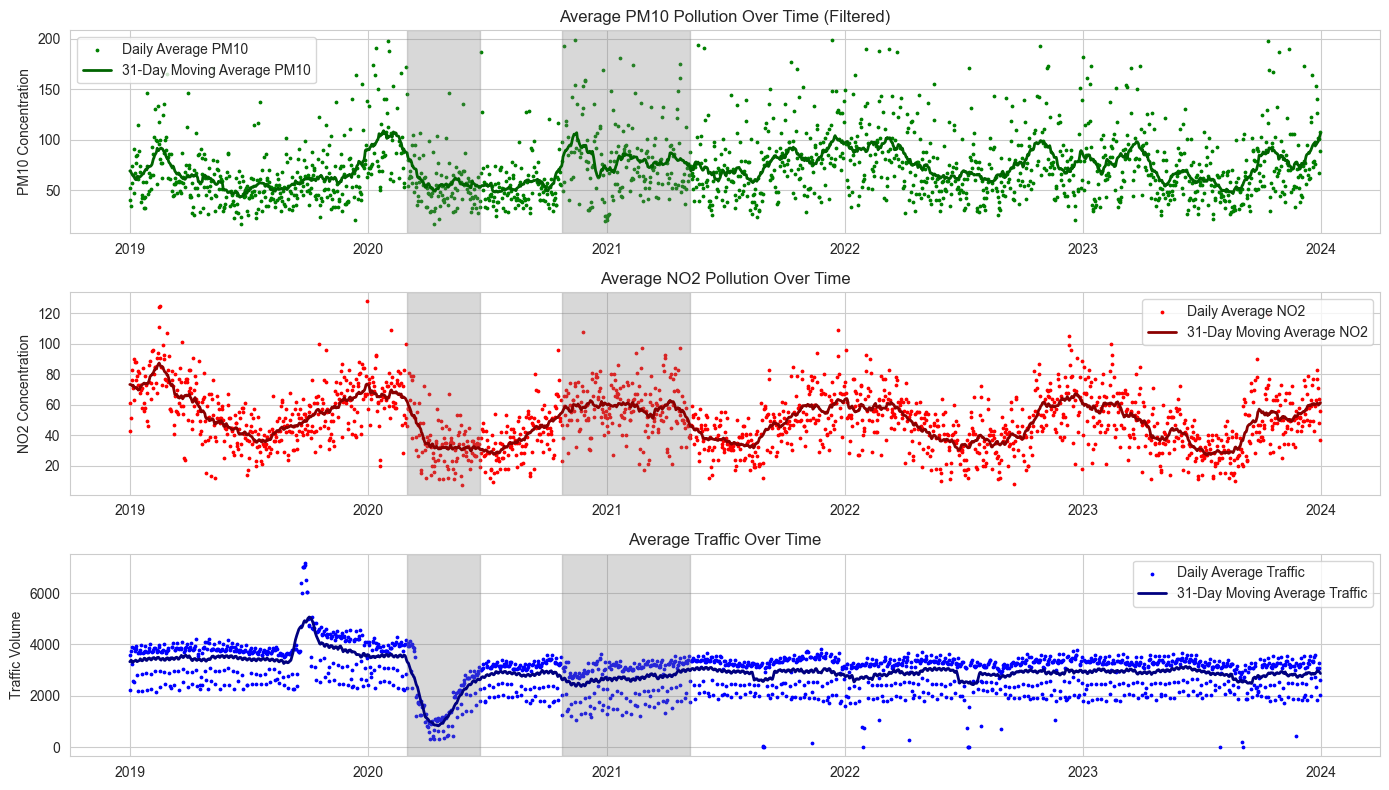

In [93]:
import matplotlib.dates as mdates

# Ensure that the DataFrame is sorted by date
merged_df.sort_index(inplace=True)

# Recalculate the 31-day moving averages after sorting
merged_df['NO2_GijonGlobal_MA'] = merged_df['NO2_GijonGlobal'].rolling(window=31, min_periods=1, center=True).mean()
merged_df['PM10_GijonGlobal_MA'] = merged_df['PM10_GijonGlobal'].rolling(window=31, min_periods=1, center=True).mean()

# If daily_avg_traffic is a separate DataFrame or Series, ensure it's sorted too
daily_avg_traffic.sort_index(inplace=True)
daily_avg_traffic_MA = daily_avg_traffic.rolling(window=31, min_periods=1, center=True).mean()

# Filter out PM10 values greater than 200
filtered_PM10 = merged_df['PM10_GijonGlobal'][merged_df['PM10_GijonGlobal'] <= 200]

# Recalculate the 31-day moving average for the filtered PM10 data
filtered_PM10_MA = filtered_PM10.rolling(window=31, min_periods=1, center=True).mean()

# Define COVID lockdown periods
lockdown_start_1 = mdates.date2num(pd.to_datetime('2020-03-01'))
lockdown_end_1 = mdates.date2num(pd.to_datetime('2020-06-21'))
lockdown_start_2 = mdates.date2num(pd.to_datetime('2020-10-25'))
lockdown_end_2 = mdates.date2num(pd.to_datetime('2021-05-09'))

# Now plot the graphs again, with shaded regions for COVID lockdowns
plt.figure(figsize=(14, 8))

# PM10 plot
plt.subplot(3, 1, 1)
plt.scatter(filtered_PM10.index, filtered_PM10, label='Daily Average PM10', color='green', s=3)
plt.plot(filtered_PM10.index, filtered_PM10_MA, label='31-Day Moving Average PM10', color='darkgreen', linewidth=2)
plt.axvspan(lockdown_start_1, lockdown_end_1, color='grey', alpha=0.3)
plt.axvspan(lockdown_start_2, lockdown_end_2, color='grey', alpha=0.3)

plt.title('Average PM10 Pollution Over Time (Filtered)')
plt.ylabel('PM10 Concentration')
plt.legend()

# NO2 plot
plt.subplot(3, 1, 2)
plt.scatter(merged_df.index, merged_df['NO2_GijonGlobal'], label='Daily Average NO2', color='red', s=3)
plt.plot(merged_df.index, merged_df['NO2_GijonGlobal_MA'], label='31-Day Moving Average NO2', color='darkred', linewidth=2)
plt.axvspan(lockdown_start_1, lockdown_end_1, color='grey', alpha=0.3)
plt.axvspan(lockdown_start_2, lockdown_end_2, color='grey', alpha=0.3)

plt.title('Average NO2 Pollution Over Time')
plt.ylabel('NO2 Concentration')
plt.legend()

# Traffic plot
plt.subplot(3, 1, 3)
plt.scatter(daily_avg_traffic.index, daily_avg_traffic, label='Daily Average Traffic', color='blue', s=3)
plt.plot(daily_avg_traffic.index, daily_avg_traffic_MA, label='31-Day Moving Average Traffic', color='navy', linewidth=2)
plt.axvspan(lockdown_start_1, lockdown_end_1, color='grey', alpha=0.3)
plt.axvspan(lockdown_start_2, lockdown_end_2, color='grey', alpha=0.3)

plt.title('Average Traffic Over Time')
plt.ylabel('Traffic Volume')
plt.legend()

plt.tight_layout()
plt.show()


In [79]:
# Define the COVID and equivalent periods
covid_period_2020 = ('2020-03-01', '2020-06-21')
post_covid_period_2020 = ('2020-10-25', '2021-05-09')
equivalent_pre_period_2019 = ('2019-03-01', '2019-06-21')
equivalent_post_period_2019 = ('2019-10-25', '2020-05-09')
equivalent_pre_period_2021 = ('2021-03-01', '2021-06-21')
equivalent_post_period_2021 = ('2021-10-25', '2022-05-09')

# Function to calculate mean NO2 and traffic within given periods
def calculate_mean_during_period(df, traffic_series, start_date, end_date):
    period_df = df[start_date:end_date]
    period_traffic = traffic_series[start_date:end_date]
    mean_no2 = period_df['NO2_GijonGlobal'].mean()
    mean_traffic = period_traffic.mean()
    return mean_no2, mean_traffic

# Calculate means for each period
means_during_covid = calculate_mean_during_period(merged_df, daily_avg_traffic, *covid_period_2020)
means_after_covid = calculate_mean_during_period(merged_df, daily_avg_traffic, *post_covid_period_2020)
means_equivalent_pre_2019 = calculate_mean_during_period(merged_df, daily_avg_traffic, *equivalent_pre_period_2019)
means_equivalent_post_2019 = calculate_mean_during_period(merged_df, daily_avg_traffic, *equivalent_post_period_2019)
means_equivalent_pre_2021 = calculate_mean_during_period(merged_df, daily_avg_traffic, *equivalent_pre_period_2021)
means_equivalent_post_2021 = calculate_mean_during_period(merged_df, daily_avg_traffic, *equivalent_post_period_2021)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Period': ['COVID 2020', 'Post-COVID 2020', 'Pre-COVID 2019', 'Post-COVID 2019', 'Pre-COVID 2021', 'Post-COVID 2021'],
    'Mean_NO2': [means_during_covid[0], means_after_covid[0], means_equivalent_pre_2019[0], means_equivalent_post_2019[0], means_equivalent_pre_2021[0], means_equivalent_post_2021[0]],
    'Mean_Traffic': [means_during_covid[1], means_after_covid[1], means_equivalent_pre_2019[1], means_equivalent_post_2019[1], means_equivalent_pre_2021[1], means_equivalent_post_2021[1]]
})

# Now you can plot this data or inspect it to draw conclusions
comparison_df


,Period,Mean_NO2,Mean_Traffic
0,COVID 2020,35.964602,1822.898599
1,Post-COVID 2020,57.928934,2669.790904
2,Pre-COVID 2019,54.973451,3476.785767
3,Post-COVID 2019,55.707071,2911.568392
4,Pre-COVID 2021,49.761062,2927.043879
5,Post-COVID 2021,56.482234,2863.444585


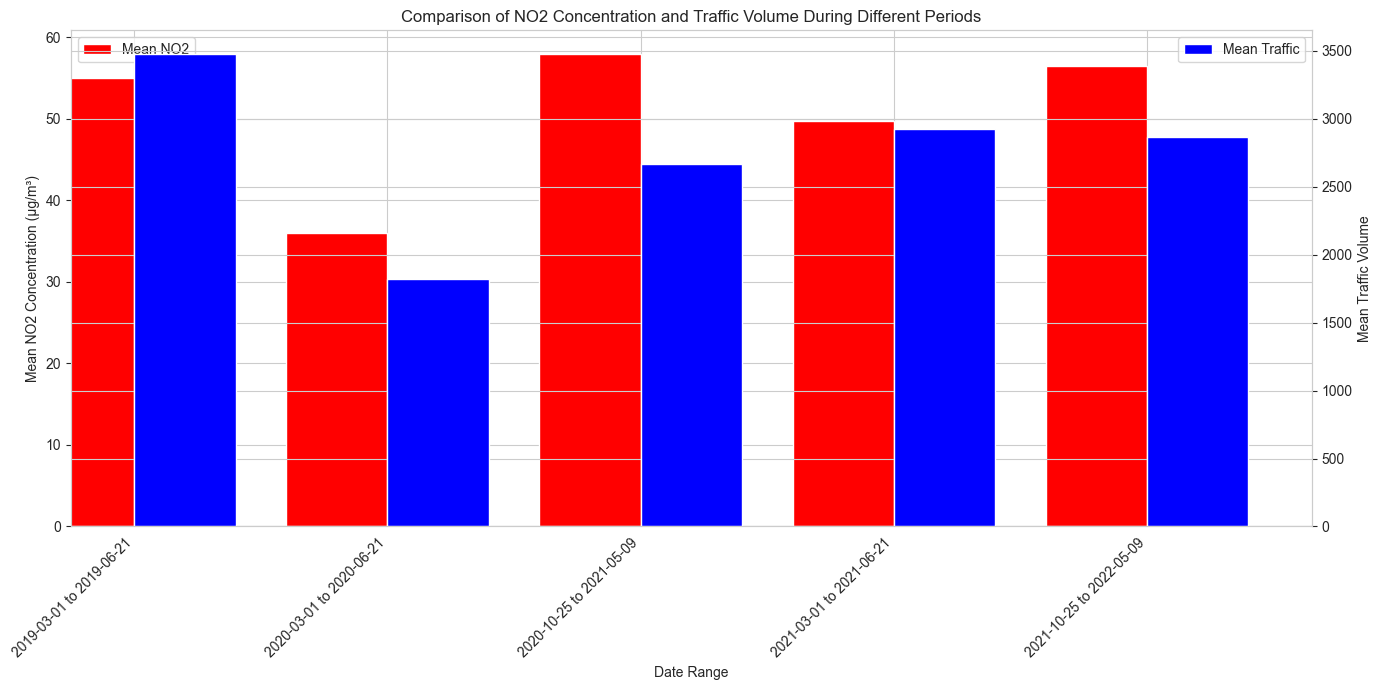

In [82]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the COVID and equivalent periods
covid_period_2020 = ('2020-03-01', '2020-06-21')
post_covid_period_2020 = ('2020-10-25', '2021-05-09')
equivalent_pre_period_2019 = ('2019-03-01', '2019-06-21')
equivalent_post_period_2019 = ('2019-10-25', '2020-05-09')
equivalent_pre_period_2021 = ('2021-03-01', '2021-06-21')
equivalent_post_period_2021 = ('2021-10-25', '2022-05-09')

# Function to calculate mean NO2 and traffic within given periods
def calculate_mean_during_period(df, traffic_series, start_date, end_date):
    period_df = df[start_date:end_date]
    period_traffic = traffic_series[start_date:end_date]
    mean_no2 = period_df['NO2_GijonGlobal'].mean()
    mean_traffic = period_traffic.mean()
    return mean_no2, mean_traffic

# Calculate means for each period
means_during_covid = calculate_mean_during_period(merged_df, daily_avg_traffic, *covid_period_2020)
means_after_covid = calculate_mean_during_period(merged_df, daily_avg_traffic, *post_covid_period_2020)
means_equivalent_pre_2019 = calculate_mean_during_period(merged_df, daily_avg_traffic, *equivalent_pre_period_2019)
means_equivalent_post_2019 = calculate_mean_during_period(merged_df, daily_avg_traffic, *equivalent_post_period_2019)
means_equivalent_pre_2021 = calculate_mean_during_period(merged_df, daily_avg_traffic, *equivalent_pre_period_2021)
means_equivalent_post_2021 = calculate_mean_during_period(merged_df, daily_avg_traffic, *equivalent_post_period_2021)


merged_df.sort_index(inplace=True)
daily_avg_traffic.sort_index(inplace=True)

# Define the COVID and equivalent periods
periods = {
    'Pre-COVID 2019': ('2019-03-01', '2019-06-21'),
    'COVID 2020': ('2020-03-01', '2020-06-21'),
    'Post-COVID 2020': ('2020-10-25', '2021-05-09'),
    'Pre-COVID 2021': ('2021-03-01', '2021-06-21'),
    'Post-COVID 2021': ('2021-10-25', '2022-05-09'),
}

# Calculate mean NO2 and traffic for each period
mean_values = []
for period, (start_date, end_date) in periods.items():
    mean_no2 = merged_df.loc[start_date:end_date, 'NO2_GijonGlobal'].mean()
    mean_traffic = daily_avg_traffic.loc[start_date:end_date].mean()
    mean_values.append((period, mean_no2, mean_traffic, f"{start_date} to {end_date}"))

# Create DataFrame from the calculated means
comparison_df = pd.DataFrame(mean_values, columns=['Period', 'Mean_NO2', 'Mean_Traffic', 'Date Range'])

# Plotting the comparison of means
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar plot for NO2
comparison_df.plot(x='Date Range', y='Mean_NO2', kind='bar', ax=ax1, color='red', position=1, width=0.4, label='Mean NO2')

# Create another y-axis for the traffic volume
ax2 = ax1.twinx()
comparison_df.plot(x='Date Range', y='Mean_Traffic', kind='bar', ax=ax2, color='blue', position=0, width=0.4, label='Mean Traffic')

# Labeling and layout adjustments
ax1.set_ylabel('Mean NO2 Concentration (µg/m³)')
ax2.set_ylabel('Mean Traffic Volume')
ax1.set_title('Comparison of NO2 Concentration and Traffic Volume During Different Periods')
ax1.set_xticklabels(comparison_df['Date Range'], rotation=45, ha='right')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()